### Problem Statement:  
For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


### Objective: 
Create a model that predicts whether or not an applicant will be able to repay a loan using the historical data.

### Install pymysql and sklearn-pandas

In [0]:
!pip install pymysql

In [0]:
!pip install sklearn-pandas

In [0]:
import numpy as np
import pandas as pd 
import pymysql
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Load the data

In [0]:
app_train = pd.read_csv('loan_data.csv')

In [0]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check the null values

In [0]:
app_train['TARGET'].isnull().values.any()

False

In [0]:
app_train['TARGET'].value_counts()

0    137265
1     12216
Name: TARGET, dtype: int64

In [0]:
import seaborn as sns

### Show the data distribution of the data column

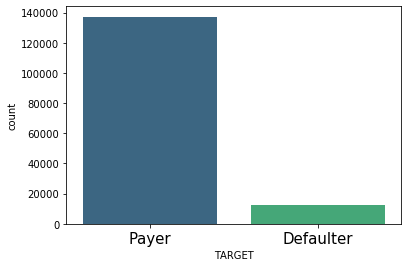

In [0]:
fig, ax = plt.subplots()
g = sns.countplot(app_train.TARGET, palette='viridis')
g.set_xticklabels(['Payer', 'Defaulter'])

plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

### Print percentage defaulter to payer

In [0]:
(len(app_train.loc[app_train.TARGET==1])) / (len(app_train.loc[app_train.TARGET==0])) * 100

### Balance the data

In [0]:
from sklearn.utils import resample

### Separate the minority from the majority classes

In [0]:
not_fraud = app_train[app_train.TARGET==0]
fraud = app_train[app_train.TARGET==1]

### Upsample the minority

In [0]:
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

### Combine majority and the upsampled minority

In [0]:
upsampled = pd.concat([not_fraud, fraud_upsampled])

### Check new class counts

In [0]:
upsampled.TARGET.value_counts()

1    137265
0    137265
Name: TARGET, dtype: int64

In [0]:
upsampled.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Plot the balanced data

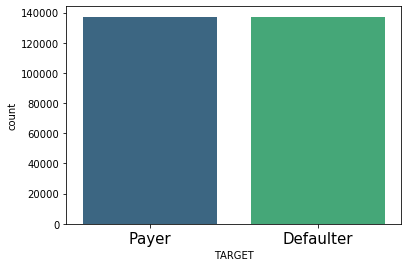

In [0]:
fig, ax = plt.subplots()
g = sns.countplot(upsampled.TARGET, palette='viridis')
g.set_xticklabels(['Payer', 'Defaulter'])

plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

### Encode (Label and one hot) on full dataset

In [0]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if upsampled[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(upsampled[col].unique())) <= 2:
            # Train on the training data
            le.fit(upsampled[col])
            # Transform both training and testing data
            upsampled[col] = le.transform(upsampled[col])
            

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


### One-hot encoding of categorical variables

In [0]:
upsampled = pd.get_dummies(upsampled)
print('Training Features shape: ', upsampled.shape)

Training Features shape:  (274530, 243)


### Split and train  the dataset

In [0]:
from sklearn.model_selection import train_test_split

features = upsampled.loc[:, upsampled.columns != 'TARGET']
target = upsampled.TARGET
class_names = upsampled.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [0]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((219624, 242), (54906, 242), (219624,), (54906,))

In [0]:
features_train=features_train.fillna(features_train.median())

In [0]:
list_categorical=[]
for col in features_train:
    if features_train[col].dtype == 'object'  and features_train[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_train[col]
    features_train[col]=imputer.fit_transform(data)

In [0]:
features_test=features_test.fillna(features_test.median())

In [0]:
list_categorical=[]
for col in features_test:
    if features_test[col].dtype == 'object'  and features_test[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_test[col]
    features_test[col]=imputer.fit_transform(data)

In [0]:
upsampled.fillna(app_train.median(), inplace=True)

In [0]:
upsampled.isnull().values.any()

False

In [0]:
upsampled.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

features = upsampled.drop(['TARGET'], axis=1)
target = upsampled.TARGET
class_names = upsampled.TARGET

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [0]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((219624, 242), (54906, 242), (219624,), (54906,))

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
features_train=np.array(features_train)
target_train=np.array(target_train)
features_test=np.array(features_test)
target_test=np.array(target_test)

### Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [0]:
target_train.shape

(219624,)

### Deep Neural network with 4 layers

4 layers with 2 hidden layer and the hidden layer has 80 neurons 

In [0]:
model = Sequential()
model.add(Dense(80, input_dim=242, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [0]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fit the model

In [0]:
model.fit(features_train_scaled, target_train, epochs=50)

Epoch 1/50
219624/219624 [==============================] - 22s 100us/step - loss: 0.6073 - accuracy: 0.6717
Epoch 2/50
219624/219624 [==============================] - 21s 98us/step - loss: 0.5840 - accuracy: 0.6897
Epoch 3/50
219624/219624 [==============================] - 23s 107us/step - loss: 0.5661 - accuracy: 0.7038
Epoch 4/50
219624/219624 [==============================] - 22s 101us/step - loss: 0.5507 - accuracy: 0.7146
Epoch 5/50
219624/219624 [==============================] - 23s 103us/step - loss: 0.5392 - accuracy: 0.7233
Epoch 6/50
219624/219624 [==============================] - 23s 106us/step - loss: 0.5306 - accuracy: 0.7285
Epoch 7/50
219624/219624 [==============================] - 24s 108us/step - loss: 0.5224 - accuracy: 0.7357
Epoch 8/50
219624/219624 [==============================] - 23s 106us/step - loss: 0.5160 - accuracy: 0.7390
Epoch 9/50
219624/219624 [==============================] - 24s 108us/step - loss: 0.5100 - accuracy: 0.7432
Epoch 10/50
219624/2

### Print the model summary

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                19440     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 81        
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


### Evaluate the matrices

In [0]:
test_loss, test_acc = model.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

54906/54906 [==============================] - 2s 43us/step
Test accuracy: 0.8001493215560913


In [0]:
predictions = model.predict(features_test_scaled)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.8001493461552471

In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[20177,  7404],
       [ 3569, 23756]])

In [0]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(20177, 7404, 3569, 23756)

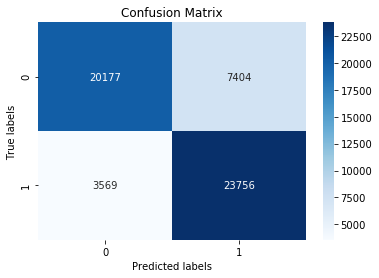

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels((['0', '1'])); ax.yaxis.set_ticklabels(['0', '1']);

### Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)

In [0]:
Sensitivity = TP/(TP+FN)
Sensitivity

### Area Under the Receiver Operating Characteristic Curve (ROC AUC)

> Indented block



In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.8741632545814568